# Using Word Embeddings for Twitter Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
%cd /content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/Dataset

/content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/Dataset


### Delete emoji

In [68]:
!pip install clean-text

### Converts Unicode characters to ASCII characters

In [69]:
!pip install unidecode

## 1. Preprocessing Data + Data Visualization

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read file data

In [127]:

pathTrain = './Train/twitter_training.csv'
pathValid = './Validation/twitter_validation.csv'

# Names for columns in the dataframe
column_names = ['ID', 'Name','Label', 'Content']

# Read file CSV and Name the columns
df_train = pd.read_csv(pathTrain, names=column_names)
df_valid = pd.read_csv(pathValid, names=column_names)

# Show data
print('-----------------------------------------DATA TRAIN---------------------------------------')
print(df_train)
df_train.info()
print('-----------------------------------------DATA VALIDATION----------------------------------')
print(df_valid)
df_valid.info()


-----------------------------------------DATA TRAIN---------------------------------------
         ID         Name     Label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows p

### Data visualization

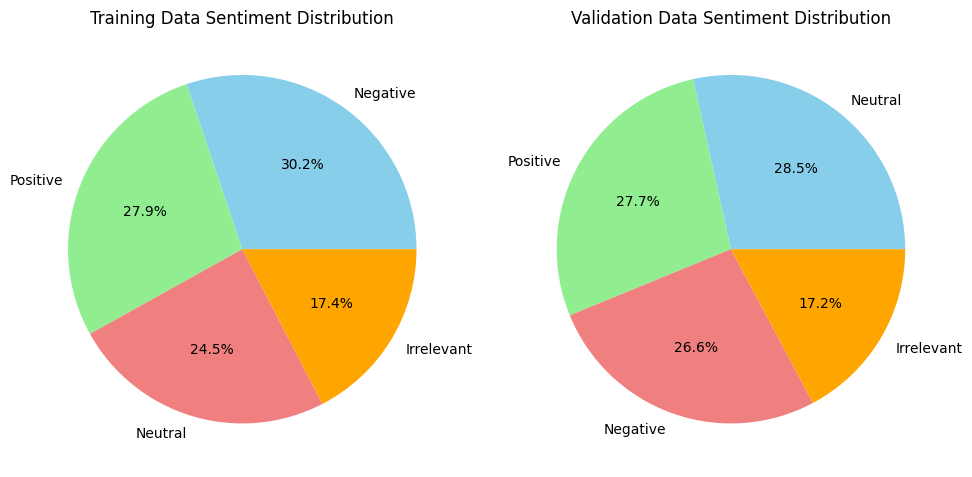

In [128]:

# Calculate the number of sentiment labels in training data and validation data
train_sentiment_counts = df_train['Label'].value_counts()
valid_sentiment_counts = df_valid['Label'].value_counts()

# Draw a pie chart for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')

# Draw a pie chart for the valid data
plt.subplot(1, 2, 2)
plt.pie(valid_sentiment_counts, labels=valid_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()


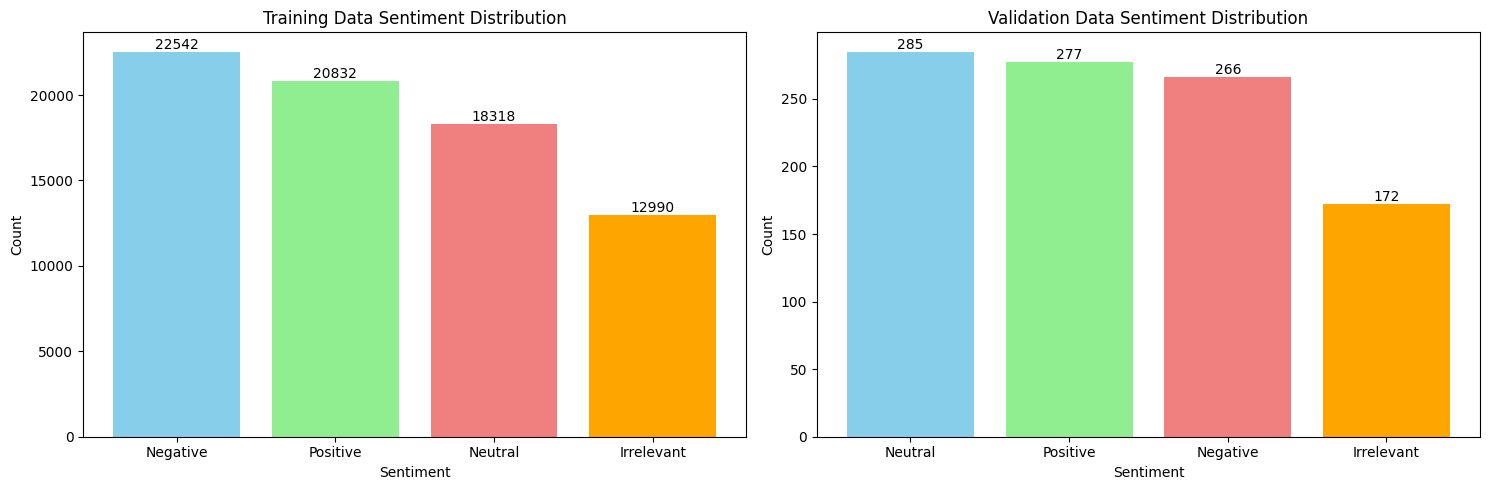

In [129]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_sentiment_counts.index, train_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(train_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(valid_sentiment_counts.index, valid_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(valid_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Convert text data to numpy arrays and Convert labels to integers for use during training

In [130]:
# Get the column 'content' and assign it to an array
train_sentences = df_train['Content'].to_numpy()
valid_sentences = df_valid['Content'].to_numpy()

# Convert the label value to the corresponding number
label_mapping = {'Positive': 0, 'Negative': 1,'Neutral' : 2,'Irrelevant': 3,}
train_label = df_train['Label'].map(label_mapping)
valid_label = df_valid['Label'].map(label_mapping)


In [131]:
print(train_sentences)
train_label

['im getting on borderlands and i will murder you all ,'
 'I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,' ...
 'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'
 'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice'
 'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice']


0        0
1        0
2        0
3        0
4        0
        ..
74677    0
74678    0
74679    0
74680    0
74681    0
Name: Label, Length: 74682, dtype: int64

In [132]:
print(valid_sentences[:10])  # Show the first 10 elements of the array
valid_label

['I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'
 "BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"
 '@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'
 "CSGO matchmaking is so full of closet hacking, it's a truly awful game."
 'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…'
 'Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was loading up some fifa points, she took my card and I’m having to use my paypal account but it isn’t working, can you help me resolve it please?'
 'Thank you @EAMaddenNFL!

0      3
1      2
2      1
3      1
4      2
      ..
995    3
996    3
997    0
998    0
999    2
Name: Label, Length: 1000, dtype: int64

In [133]:
print(train_sentences[0])
train_label[0]

im getting on borderlands and i will murder you all ,


0

### Remove emojis in sentence

In [134]:
from cleantext import clean

In [135]:
# Create an array to store sentences that remove emojis
remove_emoji_train_sentences = []
remove_emoji_valid_sentences = []

# Process and add sentences to the processed list
for sentence in train_sentences:
    remove_emoji_train_sentences.append(clean(sentence, no_emoji=True))

for sentence in valid_sentences:
    remove_emoji_valid_sentences.append(clean(sentence, no_emoji=True))

In [136]:
print(remove_emoji_train_sentences[:10])
print(remove_emoji_valid_sentences[:10])

['im getting on borderlands and i will murder you all ,', 'i am coming to the borders and i will kill you all,', 'im getting on borderlands and i will kill you all,', 'im coming on borderlands and i will murder you all,', 'im getting on borderlands 2 and i will murder you me all,', 'im getting into borderlands and i can murder you all,', "so i spent a few hours making something for fun. . . if you don't know i am a huge @borderlands fan and maya is one of my favorite characters. so i decided to make myself a wallpaper for my pc. . here is the original image versus the creation i made :) enjoy! pic.twitter.com/mlsi5wf9jg", "so i spent a couple of hours doing something for fun... if you don't know that i'm a huge @ borderlands fan and maya is one of my favorite characters, i decided to make a wallpaper for my pc.. here's the original picture compared to the creation i made:) have fun! pic.twitter.com / mlsi5wf9jg", "so i spent a few hours doing something for fun... if you don't know i'm 

### Converted our labels to one-hot-encoding values

In [137]:
from sklearn.preprocessing import LabelBinarizer

In [138]:
#Converted our labels to one-hot-encoding values. Ex : 1 ----->[0,1,0,0,0,0,0,0,0,0]
lb = LabelBinarizer()

In [139]:
train_label = lb.fit_transform(train_label)
valid_label = lb.fit_transform(valid_label)

In [140]:
print(train_label[0])

[1 0 0 0]


### Create vocabulary

In [141]:
vocabulary_size = 10000

embedding_dim = 64

max_length_sentence = 150

In [142]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Text vectorization turns each text into a string of integers (each integer is the index of the token in the dictionary)

In [143]:
tokenizer = Tokenizer(num_words=vocabulary_size , oov_token = 'OOV', lower = True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

In [144]:
tokenizer.fit_on_texts(remove_emoji_train_sentences)

In [145]:
# If you want to display both you can use this syntax : tokenizer.word_index
print(list(tokenizer.word_index.items())[:50])  # Display the first 10 key-value pairs

[('OOV', 1), ('the', 2), ('i', 3), ('to', 4), ('and', 5), ('a', 6), ('of', 7), ('is', 8), ('in', 9), ('for', 10), ('this', 11), ('it', 12), ('you', 13), ('on', 14), ('my', 15), ('that', 16), ('com', 17), ('with', 18), ('game', 19), ('so', 20), ('be', 21), ('me', 22), ('have', 23), ('just', 24), ('but', 25), ('not', 26), ('are', 27), ('all', 28), ('at', 29), ('was', 30), ('like', 31), ('out', 32), ('2', 33), ('from', 34), ('your', 35), ("i'm", 36), ('pic', 37), ('twitter', 38), ('now', 39), ('we', 40), ('get', 41), ('as', 42), ('they', 43), ('if', 44), ('has', 45), ('one', 46), ('t', 47), ('do', 48), ('good', 49), ('about', 50)]


### Standardize train data

### Converts sentences from text to numeric strings, based on the previously created vocabulary dictionary.

In [146]:
remove_emoji_train_sentences = tokenizer.texts_to_sequences(remove_emoji_train_sentences)

### The padding strings in the sentence have the same length

In [147]:
padding_train_sentences = pad_sequences(remove_emoji_train_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [148]:
padding_train_sentences

array([[ 307,  176,   14, ...,    0,    0,    0],
       [   3,  123,  405, ...,    0,    0,    0],
       [ 307,  176,   14, ...,    0,    0,    0],
       ...,
       [  24, 1962,    2, ...,    0,    0,    0],
       [  24, 1962,  743, ...,    0,    0,    0],
       [  24,   31,    2, ...,    0,    0,    0]], dtype=int32)

In [149]:
padding_train_sentences.shape

(74682, 150)

### Standardize validation data

In [150]:
remove_emoji_valid_sentences = tokenizer.texts_to_sequences(remove_emoji_valid_sentences)
padding_valid_sentences = pad_sequences(remove_emoji_valid_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [151]:
padding_valid_sentences.shape

(1000, 150)

## 2. Build models and save model

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten,Dense


In [153]:
model = Sequential()

model.add(Embedding(vocabulary_size,embedding_dim,input_length=max_length_sentence))

model.add(Flatten())

model.add(Dense(10,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [154]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 64)           640000    
                                                                 
 flatten_3 (Flatten)         (None, 9600)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                96010     
                                                                 
 dense_7 (Dense)             (None, 4)                 44        
                                                                 
Total params: 736054 (2.81 MB)
Trainable params: 736054 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [155]:
print('Building model.................')
history = model.fit(padding_train_sentences,train_label,epochs=20,validation_data=(padding_valid_sentences,valid_label))
print('Success!!!!!!!!!!!!!!!!!!!!!!!!')

Building model.................
Epoch 1/20
2334/2334 [==============================] - 30s 13ms/step - loss: 1.0585 - accuracy: 0.5241 - val_loss: 0.5158 - val_accuracy: 0.8390
Epoch 2/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.4369 - accuracy: 0.8392 - val_loss: 0.1394 - val_accuracy: 0.9650
Epoch 3/20
2334/2334 [==============================] - 33s 14ms/step - loss: 0.2077 - accuracy: 0.9230 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 4/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.1432 - accuracy: 0.9443 - val_loss: 0.0946 - val_accuracy: 0.9730
Epoch 5/20
2334/2334 [==============================] - 31s 13ms/step - loss: 0.1186 - accuracy: 0.9524 - val_loss: 0.0888 - val_accuracy: 0.9820
Epoch 6/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.1030 - accuracy: 0.9568 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 7/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.0958 - accur

### Show loss and accuracy train and validation

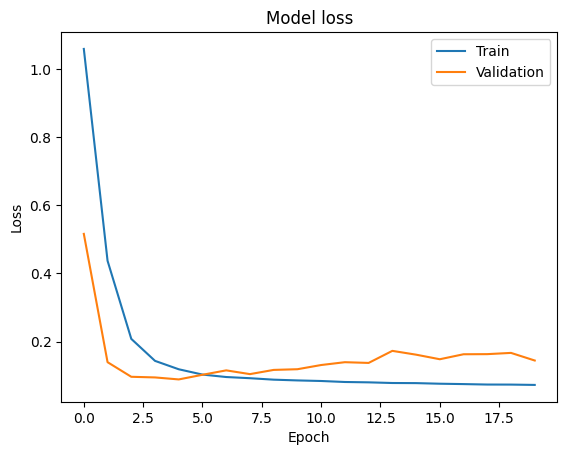

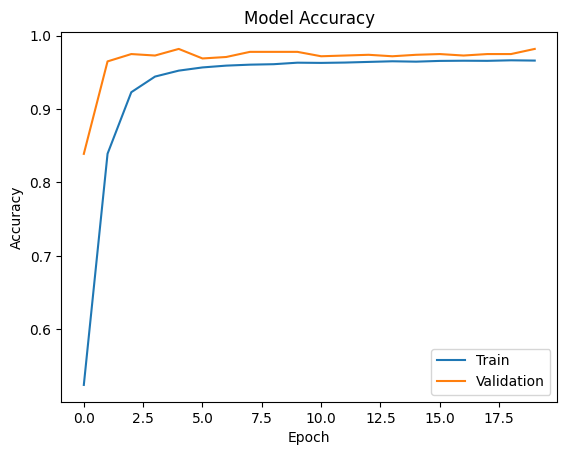

In [156]:
# Plot the loss of training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Save model

In [157]:
%cd /content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/Model

/content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/Model


In [158]:
import tensorflow as tf

In [159]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3. Test the model using real data

### Test with self-created samples

In [160]:
test_sentence = ['I love you', 'I so bad boy']
test_seq = tokenizer.texts_to_sequences(test_sentence)
padded_test_seq = pad_sequences(test_seq,maxlen=max_length_sentence,truncating='post',padding='post')


In [161]:
print(padded_test_seq)

[[  3  59  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  3  20 150 722   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  

In [162]:
result = model.predict(padded_test_seq)

1/1 [==============================] - 0s 57ms/step


In [163]:
print(result)

[[8.2916307e-01 1.6094817e-02 4.2914301e-03 1.5045068e-01]
 [5.6850145e-06 9.5442128e-01 1.6883463e-05 4.5556206e-02]]


In [164]:
print(np.argmax(result[0]))

0


In [165]:
label = ['Positive','Negative','Neutral','Irrelevant']

for i in range(len(result)):
    predicted_label = np.argmax(result[i])
    predicted_class = label[predicted_label]
    print("---------- Emotion prediction " + str(i) + "------------")
    print("Sentence: ", test_sentence[i])
    print("Emotion: ", predicted_class)



---------- Emotion prediction 0------------
Sentence:  I love you
Emotion:  Positive
---------- Emotion prediction 1------------
Sentence:  I so bad boy
Emotion:  Negative


### Sentiment analysis with binance app review data

In [166]:
%cd /content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/Dataset

/content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/Dataset


In [167]:
pathTest = './Test/binance_reviews.csv'

df_test = pd.read_csv(pathTest)

### Processing input data

In [168]:
test_sentences_binance = df_test['content'].to_numpy()

In [169]:
test_seq_binance = tokenizer.texts_to_sequences(test_sentences_binance)
padded_test_seq_binance = pad_sequences(test_seq_binance,maxlen=max_length_sentence,truncating='post',padding='post')

In [170]:
result_binance = model.predict(padded_test_seq_binance)

13/13 [==============================] - 0s 3ms/step


In [171]:
label = ['Positive','Negative','Neutral','Irrelevant']


for i in range(len(result_binance)):
    predicted_label = np.argmax(result_binance[i])
    predicted_class = label[predicted_label]
    print("---------- Emotion prediction " + str(i) + "------------")
    print("Sentence: ", test_sentences_binance[i])
    print("Emotion: ", predicted_class)
    if i == 10:
        break

---------- Emotion prediction 0------------
Sentence:  trade execution delay
Emotion:  Neutral
---------- Emotion prediction 1------------
Sentence:  Good
Emotion:  Positive
---------- Emotion prediction 2------------
Sentence:  Binance blocks accounts without any explanations. This is unacceptable. Rules are for both parties of agreement. If they block user account, they should inform their client for reasons. It's not a joke. It's abt money. And I am pretty sure Binance switched to AI in support department. This is kind of humiliating treatment of clients. Sorry if I'm wrong but I have this feeling after applying for appeal several times.
Emotion:  Negative
---------- Emotion prediction 3------------
Sentence:  good application please give me 1000$
Emotion:  Negative
---------- Emotion prediction 4------------
Sentence:  GOOD
Emotion:  Positive
---------- Emotion prediction 5------------
Sentence:  good app
Emotion:  Negative
---------- Emotion prediction 6------------
Sentence:  You

### Visualize results through column charts

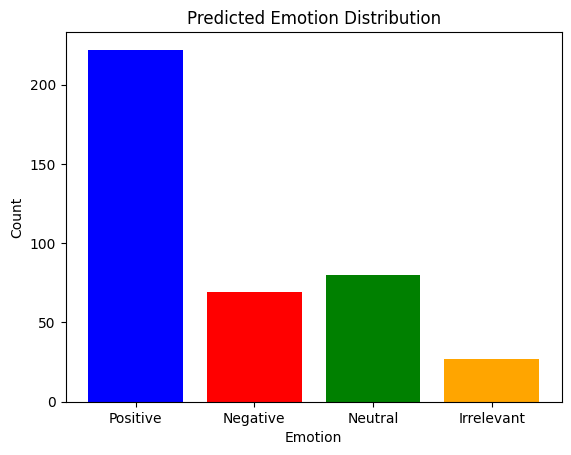

In [172]:
predicted_labels = []

for i in range(len(result_binance)):
    predicted_label = np.argmax(result_binance[i])
    predicted_labels.append(label[predicted_label])

label_counts = {label: predicted_labels.count(label) for label in label}

plt.bar(label_counts.keys(), label_counts.values(), color=['blue', 'red', 'green', 'orange'])
plt.title('Predicted Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


## 4. Visually vectorize each word

In [ ]:
%cd /content/drive/MyDrive/AI_project/Natural_language_processing/Twitter_Sentiment_Analysis/DataVectorVisualization

In [173]:
# Get the first layer in the model
e = model.layers[0]

In [174]:
#weights will contain the weights of the first layer
weights = e.get_weights()[0]

In [175]:
weights.shape

(10000, 64)

In [176]:
# This module provides classes and functions to work with I/O objects (Input/Output
import io

In [177]:
# Initialize the vector save file
out_vector = io.open('vector.tsv','w',encoding='utf-8')

In [178]:
# Initialize the word save file
out_word = io.open('word.tsv','w',encoding='utf-8')

### The purpose of this loop is to write out two files, one file containing each word in the vocabulary and one file containing the vector corresponding to each word.

In [179]:
for index in range(1,vocabulary_size):
  if index in tokenizer.index_word:
    word = tokenizer.index_word[index]
    vector = weights[index]
    out_word.write(word + "\n")
    out_vector.write('\t'.join([str(x) for x in vector]) + "\n")

out_word.close()
out_vector.close()

### After saving the two corresponding files, you can go to this website [here](https://projector.tensorflow.org/) to perform vector visualization.